In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_excel('online_retail_dataset.xlsx')


In [2]:
df.dropna(axis=0,how="any")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
duplicate_rows = df[df.duplicated(keep="last")]
print(f"the duplicated rows are as follows: {duplicate_rows}")

the duplicated rows are as follows:        Invoice StockCode                        Description  Quantity  \
485     536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
489     536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
494     536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
521     536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
548     536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...        ...       ...                                ...       ...   
541640  581538     22992             REVOLVER WOODEN RULER          1   
541644  581538     22694                       WICKER STAR          1   
541646  581538     23275   SET OF 3 HANGING OWLS OLLIE BEAK         1   
541656  581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541666  581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  Price  Customer ID         Country  
485    2010-12-01 11:4

In [4]:
result = df.drop_duplicates(keep=False)
len(result.index)

531763

In [20]:
# Checking where the null values are present in the given data 
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [21]:
# df.dropna(subset=['Description'])
df.dropna(subset=['Customer ID'], inplace=True)
df.drop(df[df['Price'] == 0].index)
df.drop_duplicates()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [24]:
# Total sales by product or customer

df['Total Price'] = df['Quantity']* df['Price']
df.groupby('Description')

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


<AxesSubplot:xlabel='Country'>

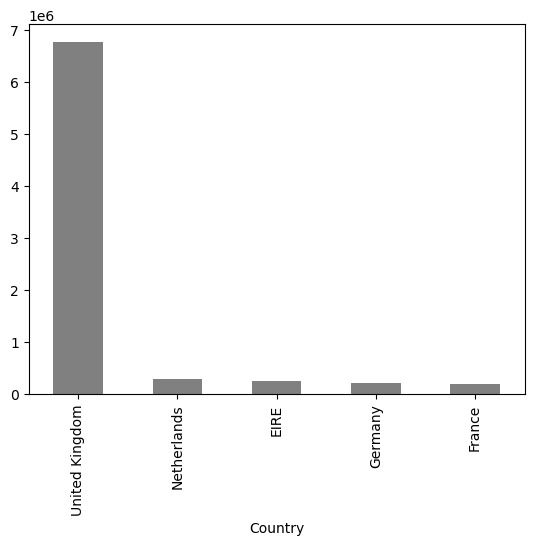

In [34]:
# Countries where people are spending more
countries = df.groupby('Country')['Total Price'].sum()
sorted = countries.sort_values(ascending=False)
sorted[:5].plot(kind='bar', color='gray')

<AxesSubplot:xlabel='Customer ID'>

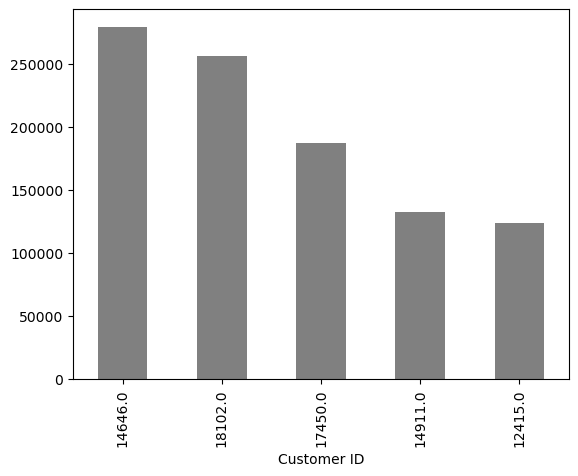

In [33]:
# Top 5 customers 
df.groupby('Customer ID')['Total Price'].sum().sort_values(ascending = False).iloc[:5].plot(kind='bar' ,color='gray')